In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df  = pd.read_csv(r'datasets\dataset - NBL.csv')


In [2]:
import matplotlib.pyplot as plt
home = df[['home_team', 'score_home', 'score_away']].copy()
#columns = ['home_team','score_home','score_away']
#df1 = pd.DataFrame(df, columns=columns)
home_wins = 0 
away_wins = 0 
total_games = 0 
for i,j in home.iterrows():
    team = j[0]
    home = j[1]
    away = j[2]
    if home > away:
        home_wins += 1.0
    else:
        away_wins += 1.0
total = (home_wins + away_wins)
perc = round(home_wins/total*100, 2)
print("Home Wins: " + str(home_wins) + "->  %" +  str(perc))
print("Away Wins: "+ str(away_wins) + "->  %" +  str(100-perc))
print("Total Games: " + str(total))



Home Wins: 10.0->  %50.0
Away Wins: 10.0->  %50.0
Total Games: 20.0


# New Zealand Basketball League

In [3]:
import matplotlib.pyplot as plt
home = df[['home_team', 'score_home', 'score_away']].copy()
#columns = ['home_team','score_home','score_away']
#df1 = pd.DataFrame(df, columns=columns)
home_wins = 0 
home_lost = 0 
away_wins = 0 
away_lost = 0 
draw = 0
total_games = 0 
for i,j in home.iterrows():

    home = j[1]

    away = j[2]

    if home > away:
        home_wins += 1.0
    if away > home:
        away_wins += 1.0
    if home == away:
        draw += 1.0

total = (home_wins + away_wins + draw)
perc = round(home_wins/total*100, 2)
home_perc = round((home_wins/total) * 100,2)
away_perc = round((away_wins/total) * 100,2)
draw_perc = round((draw/total) * 100,2)

print("Home Wins:  " + str(home_perc)+ "%")
print("Away Wins:  " + str(away_perc) + "%")
print("Draw Games: " + str(draw_perc) + "%")




Home Wins:  50.0%
Away Wins:  50.0%
Draw Games: 0.0%


In [4]:
print(home_wins)
print(away_wins)
print(draw)


10.0
10.0
0


In [5]:
df.head()

,date,home_team,away_team,score_home,score_away,asian handicap,total_line
0,6/23/20,Canterbury Rams,Auckland Huskies,102,70,-20.0,165.0
1,6/23/20,Taranaki Mountainairs,Nelson Giants,112,96,-1.0,178.0
2,6/24/20,Franklin Bulls,Taranaki Mountainairs,95,107,-3.5,180.5
3,6/24/20,Manawatu Jets,Otago Nuggets,100,104,-2.5,183.0
4,6/25/20,Franklin Bulls,Canterbury Rams,72,75,3.5,181.5


In [6]:
df_totals = pd.DataFrame(columns=['Streak Total' ,'Quantity Spread Win', 'Quantity Spread Loss','Quantity Over', 'Quantity Under'])
for i in range(16):
    df_totals = df_totals.append({'Streak Total': i,'Quantity Over': 0, 'Quantity Under': 0, 'Quantity Spread Win': 0, 'Quantity Spread Loss': 0},ignore_index=True )
    
def check_under(under):
    if under > 0 :
        df_totals["Quantity Under"][under] = df_totals["Quantity Under"][under] + 1
        
def check_over(over):
    if over > 0 :
        df_totals["Quantity Over"][over] = df_totals["Quantity Over"][over] + 1
        
def check_spread_win(win):
    if win > 0 :
        df_totals["Quantity Spread Win"][win] = df_totals["Quantity Spread Win"][win] + 1
        
def check_spread_loss(loss):
    if loss > 0 :
        df_totals["Quantity Spread Loss"][loss] = df_totals["Quantity Spread Loss"][loss] + 1

In [7]:
totals = df[['home_team','away_team', 'total_line']].copy()
over = 0
under = 0
total = 0


team_stats={}


for i in totals.home_team.unique():

    team_stats[i] = {
                'record': {'win': 0, 'loss': 0, 'tied': 0  },
                'totals': {'over': 0, 'under': 0, 'push': 0  },
                'spread' : {'win':0, 'loss': 0, 'push': 0 },
                'streak_spread' : {'win':0, 'loss': 0},
                'streak_total' : {'over':0, 'under': 0}}
    
    

for i in totals.away_team.unique():
    if i not in team_stats:
       
        team_stats[i] = {
                    'record': {'win': 0, 'loss': 0, 'tied': 0  },
                    'totals': {'over': 0, 'under': 0, 'push': 0 },
                    'spread' : {'win':0, 'loss': 0, 'push': 0 },
                    'streak_spread' : {'win':0, 'loss': 0},
                    'streak_total' : {'over':0, 'under': 0}}




print(len(team_stats.keys()))

7


In [8]:
#spread logic  
for ind in df.index: 
    asian_handicap_result = df['score_home'][ind] + df['asian handicap'][ind]
    spread_line = df['asian handicap'][ind]
    away_score = df['score_away'][ind]
    

    if (asian_handicap_result > away_score):
        team_stats[df['home_team'][ind]]['spread']['win']+=1
        team_stats[df['away_team'][ind]]['spread']['loss']+=1
        
        team_stats[df['home_team'][ind]]['streak_spread']['win'] +=1
        team_stats[df['away_team'][ind]]['streak_spread']['loss'] +=1
            
        check_spread_win(team_stats[df['home_team'][ind]]['streak_spread']['win'])
        check_spread_loss(team_stats[df['away_team'][ind]]['streak_spread']['loss'])
        
        team_stats[df['away_team'][ind]]['streak_spread']['win'] = 0
        team_stats[df['home_team'][ind]]['streak_spread']['loss'] = 0

        
    if (away_score > asian_handicap_result ):
        team_stats[df['home_team'][ind]]['spread']['loss']+=1
        team_stats[df['away_team'][ind]]['spread']['win']+=1
        team_stats[df['away_team'][ind]]['streak_spread']['win'] +=1
        team_stats[df['home_team'][ind]]['streak_spread']['loss'] += 1
        
        check_spread_win(team_stats[df['away_team'][ind]]['streak_spread']['win'])
        check_spread_loss(team_stats[df['home_team'][ind]]['streak_spread']['loss'])
        
        team_stats[df['away_team'][ind]]['streak_spread']['loss'] = 0
        team_stats[df['home_team'][ind]]['streak_spread']['win'] = 0
        
    if(asian_handicap_result == away_score ):
        team_stats[df['home_team'][ind]]['spread']['push']+=1
        team_stats[df['away_team'][ind]]['spread']['push']+=1 

In [9]:
#Totals logic
for ind in df.index: 
    total_result = df['score_home'][ind] + df['score_away'][ind]
    total_line = df['total_line'][ind]

    if (total_result > total_line):
        team_stats[df['home_team'][ind]]['totals']['over']+=1
        team_stats[df['away_team'][ind]]['totals']['over']+=1
        team_stats[df['home_team'][ind]]['streak_total']['over']+=1
        team_stats[df['away_team'][ind]]['streak_total']['over']+=1
        
        check_under(team_stats[df['home_team'][ind]]['streak_total']['under'])
        check_under(team_stats[df['away_team'][ind]]['streak_total']['under'])

        
        team_stats[df['home_team'][ind]]['streak_total']['under'] = 0 
        team_stats[df['away_team'][ind]]['streak_total']['under'] = 0
        
    if(total_line > total_result):
        team_stats[df['home_team'][ind]]['totals']['under']+=1
        team_stats[df['away_team'][ind]]['totals']['under']+=1
        team_stats[df['home_team'][ind]]['streak_total']['under']+=1
        team_stats[df['away_team'][ind]]['streak_total']['under']+=1
        
        check_over(team_stats[df['home_team'][ind]]['streak_total']['over'])
        check_over(team_stats[df['away_team'][ind]]['streak_total']['over'])
        
        team_stats[df['home_team'][ind]]['streak_total']['over'] = 0 
        team_stats[df['away_team'][ind]]['streak_total']['over'] = 0
        
        
    if (total_result == total_line):
        team_stats[df['home_team'][ind]]['totals']['push']+=1
        team_stats[df['away_team'][ind]]['totals']['push']+=1
        

In [10]:
# Amount of winning and losing logic 
for ind in df.index: 
    home = df['score_home'][ind]
    away = df['score_away'][ind]
    if (home > away ): 
        team_stats[df['home_team'][ind]]['record']['win']+=1
        team_stats[df['away_team'][ind]]['record']['loss']+=1
    
    if(away > home):
        team_stats[df['away_team'][ind]]['record']['win']+=1
        team_stats[df['home_team'][ind]]['record']['loss']+=1
    if(away == home):
        team_stats[df['home_team'][ind]]['record']['tied']+=1
        team_stats[df['away_team'][ind]]['record']['tied']+=1

    

In [11]:
dict_team=sorted(team_stats.keys(), key=lambda x:x.lower())
print("New Zealand  Basketablll TRENDS")
print()
for i in dict_team:
    print(i + ":")
    
    amount_spread_games = team_stats[i]['spread']['win'] + team_stats[i]['spread']['loss'] 
    amount_total_games = team_stats[i]['totals']['over'] + team_stats[i]['totals']['under']
    
    temp_win = round((team_stats[i]['spread']['win'] / amount_spread_games ) * 100,2)
    temp_lost = round((team_stats[i]['spread']['loss']  / amount_spread_games ) * 100,2)
    temp_over = round((team_stats[i]['totals']['over'] / amount_total_games ) * 100,2)
    temp_under = round((team_stats[i]['totals']['under']  / amount_total_games ) * 100,2)
    temp_record_winning = round((team_stats[i]['record']['win']  / amount_total_games ) * 100,2)
    temp_record_losing = round((team_stats[i]['record']['loss']  / amount_total_games ) * 100,2)
    
    #print("                Record Win:  " + str(temp_record_winning) + '%   ---------  ', end="")
    #print("              Record Loss:  " + str(temp_record_losing) + '%  ---------  ')
    
    
    print("                Spread Win:  " + str(temp_win) + '%   ---------  ', end="")
    print("             Spread Loss:  " + str(temp_lost) + '%  ---------  ')
    
    print("                Total Over:  " + str(temp_over) +  '%  ---------  ', end="")
    print("              Total Under:  " + str(temp_under) + '%  ---------  ')
    
    print("                Streak Over:  $" + str(team_stats[i]['streak_total']['over']  )+  '  ---------  ', end="")
    print("                Streak Under:  $" +  str(team_stats[i]['streak_total']['under']  ) + '  ---------  ')
    
    print("                Streak Win:   $" + str(team_stats[i]['streak_spread']['win']  )+  '  ---------  ', end="")
    print("                Streak Loss:   $" +  str(team_stats[i]['streak_spread']['loss']  ) + '  ---------  ')

    
    #print("                Spread Push: " + str(temp_lost)+ '%  ---------  ', end="")
    #print("               Total Push:  " + str(temp_under) + '%  ---------  ')

    


    

New Zealand  Basketablll TRENDS

Auckland Huskies:
                Spread Win:  40.0%   ---------               Spread Loss:  60.0%  ---------  
                Total Over:  40.0%  ---------                Total Under:  60.0%  ---------  
                Streak Over:  $0  ---------                  Streak Under:  $1  ---------  
                Streak Win:   $0  ---------                  Streak Loss:   $1  ---------  
Canterbury Rams:
                Spread Win:  33.33%   ---------               Spread Loss:  66.67%  ---------  
                Total Over:  66.67%  ---------                Total Under:  33.33%  ---------  
                Streak Over:  $0  ---------                  Streak Under:  $1  ---------  
                Streak Win:   $0  ---------                  Streak Loss:   $3  ---------  
Franklin Bulls:
                Spread Win:  66.67%   ---------               Spread Loss:  33.33%  ---------  
                Total Over:  16.67%  ---------                Total Unde

In [12]:
df_totals


,Streak Total,Quantity Spread Win,Quantity Spread Loss,Quantity Over,Quantity Under
0,0,0,0,0,0
1,1,14,14,9,1
2,2,5,5,0,2
3,3,1,1,1,1
4,4,0,0,1,0
5,5,0,0,0,0
6,6,0,0,0,0
7,7,0,0,0,0
8,8,0,0,0,0
9,9,0,0,0,0


In [13]:
df_ats_trends = pd.DataFrame(columns = ['Team', 'ATS Record', 'Cover %', 'Streak Win', 'Streak Loss'])
df_total_trends = pd.DataFrame( columns = ['Team', 'Total Record', 'Over %', 'Streak Over', 'Streak Under'])

for i in dict_team:
    df_ats_trends = df_ats_trends.append({'Team': i,
                                          'ATS Record': str(team_stats[i]['spread']['win']) + '-' + str(team_stats[i]['spread']['loss']),
                                          'Cover %' : round(team_stats[i]['spread']['win'] / (team_stats[i]['spread']['win'] + team_stats[i]['spread']['loss']),2),
                                          'Streak Win': team_stats[i]['streak_spread']['win'],
                                          'Streak Loss': team_stats[i]['streak_spread']['loss']},ignore_index=True )
    

    df_total_trends = df_total_trends.append({'Team': i,
                                          'Total Record': str(team_stats[i]['totals']['over']) + '-' + str(team_stats[i]['totals']['under']),
                                          'Over %' : round(team_stats[i]['totals']['over'] / (team_stats[i]['totals']['over'] + team_stats[i]['totals']['under']),2),
                                          'Streak Over': team_stats[i]['streak_total']['over'],
                                          'Streak Under': team_stats[i]['streak_total']['under']},ignore_index=True )
    
        
    
    
    

In [14]:
df

,date,home_team,away_team,score_home,score_away,asian handicap,total_line
0,6/23/20,Canterbury Rams,Auckland Huskies,102,70,-20.0,165.0
1,6/23/20,Taranaki Mountainairs,Nelson Giants,112,96,-1.0,178.0
2,6/24/20,Franklin Bulls,Taranaki Mountainairs,95,107,-3.5,180.5
3,6/24/20,Manawatu Jets,Otago Nuggets,100,104,-2.5,183.0
4,6/25/20,Franklin Bulls,Canterbury Rams,72,75,3.5,181.5
5,6/25/20,Otago Nuggets,Nelson Giants,107,82,-6.5,194.5
6,6/27/20,Auckland Huskies,Manawatu Jets,67,95,1.5,190.0
7,6/27/20,Canterbury Rams,Taranaki Mountainairs,112,101,-3.5,178.0
8,6/28/20,Franklin Bulls,Auckland Huskies,63,59,-6.5,172.5
9,6/28/20,Nelson Giants,Manawatu Jets,88,83,4.5,191.5


In [15]:
df_ats_trends


,Team,ATS Record,Cover %,Streak Win,Streak Loss
0,Auckland Huskies,2-3,0.40,0,1
1,Canterbury Rams,2-4,0.33,0,3
2,Franklin Bulls,4-2,0.67,3,0
3,Manawatu Jets,3-3,0.50,1,0
4,Nelson Giants,3-3,0.50,2,0
5,Otago Nuggets,3-2,0.60,1,0
6,Taranaki Mountainairs,3-3,0.50,0,1


In [16]:
df_total_trends

,Team,Total Record,Over %,Streak Over,Streak Under
0,Auckland Huskies,2-3,0.40,0,1
1,Canterbury Rams,4-2,0.67,0,1
2,Franklin Bulls,1-5,0.17,0,5
3,Manawatu Jets,2-4,0.33,0,2
4,Nelson Giants,2-4,0.33,0,1
5,Otago Nuggets,1-4,0.20,0,4
6,Taranaki Mountainairs,4-2,0.67,0,2


In [17]:
df = df_totals[(df_totals.T != 0).any()]


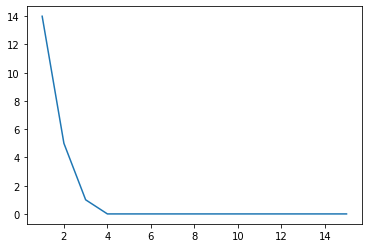

In [18]:
df['Quantity Spread Win'].plot()

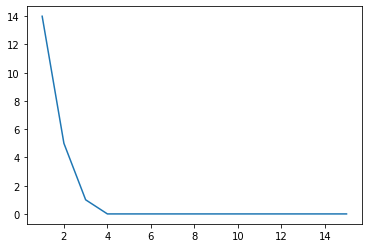

In [19]:
df['Quantity Spread Loss'].plot()

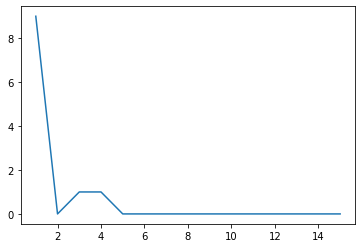

In [20]:
df['Quantity Over'].plot()

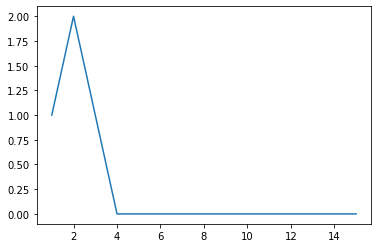

In [21]:
df['Quantity Under'].plot()